 Lab 6: Visualization of multi dimensional data


In [2]:
from pandas.plotting import parallel_coordinates
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

1. Parallel Coordinates

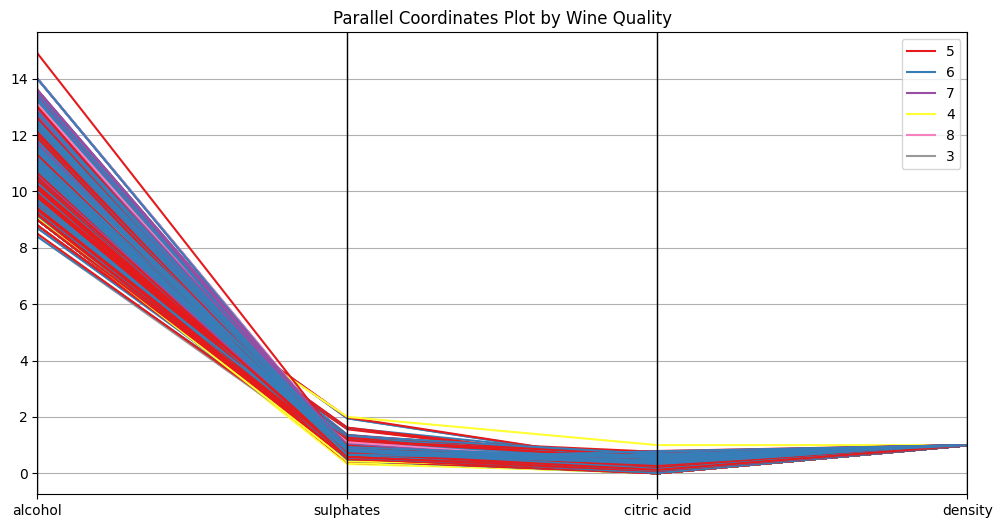

In [3]:

# Load dataset
df = pd.read_csv('data/quality_test.csv')

# Convert 'quality' to category
df['quality'] = df['quality'].astype(str)

# Select features
features = ['alcohol', 'sulphates', 'citric acid', 'density', 'quality']
df_subset = df[features]

# Plot
plt.figure(figsize=(12,6))
parallel_coordinates(df_subset, class_column='quality', colormap=plt.cm.Set1)
plt.title("Parallel Coordinates Plot by Wine Quality")
plt.grid(True)
plt.show()


2. Scatter Plot

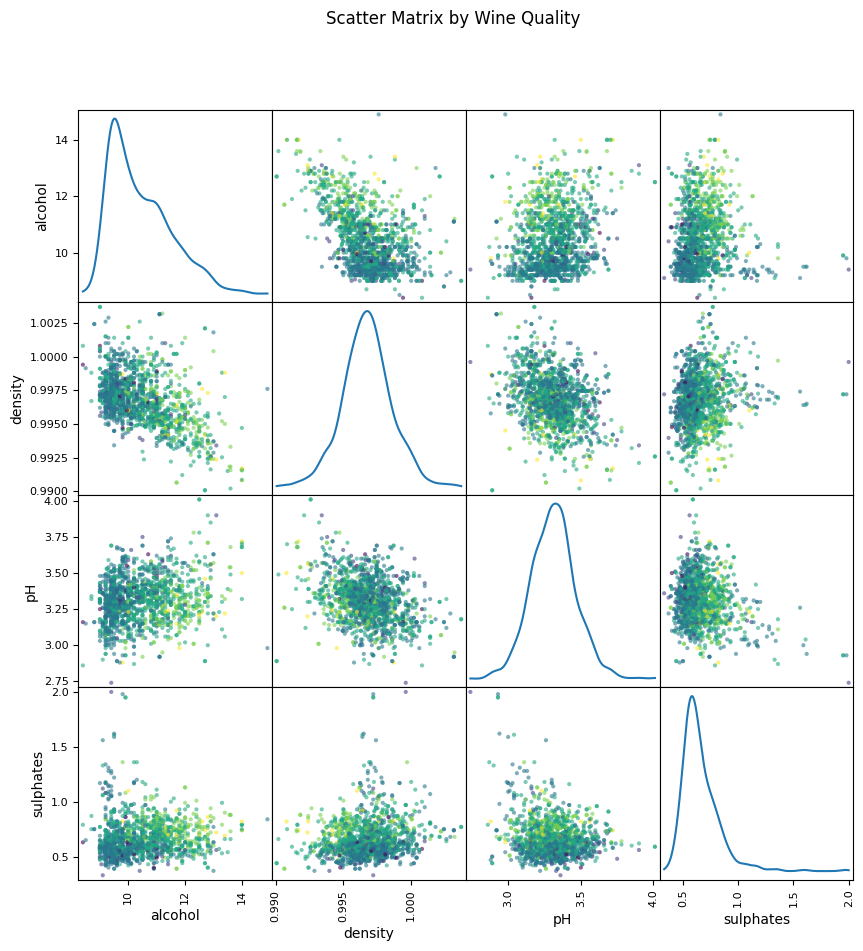

In [3]:
pd.plotting.scatter_matrix(df[['alcohol', 'density', 'pH', 'sulphates']], figsize=(10, 10), alpha=0.6, diagonal='kde', c=df['quality'].astype(int), cmap='viridis')
plt.suptitle('Scatter Matrix by Wine Quality')
plt.show()


3. Seaborn Pairplot

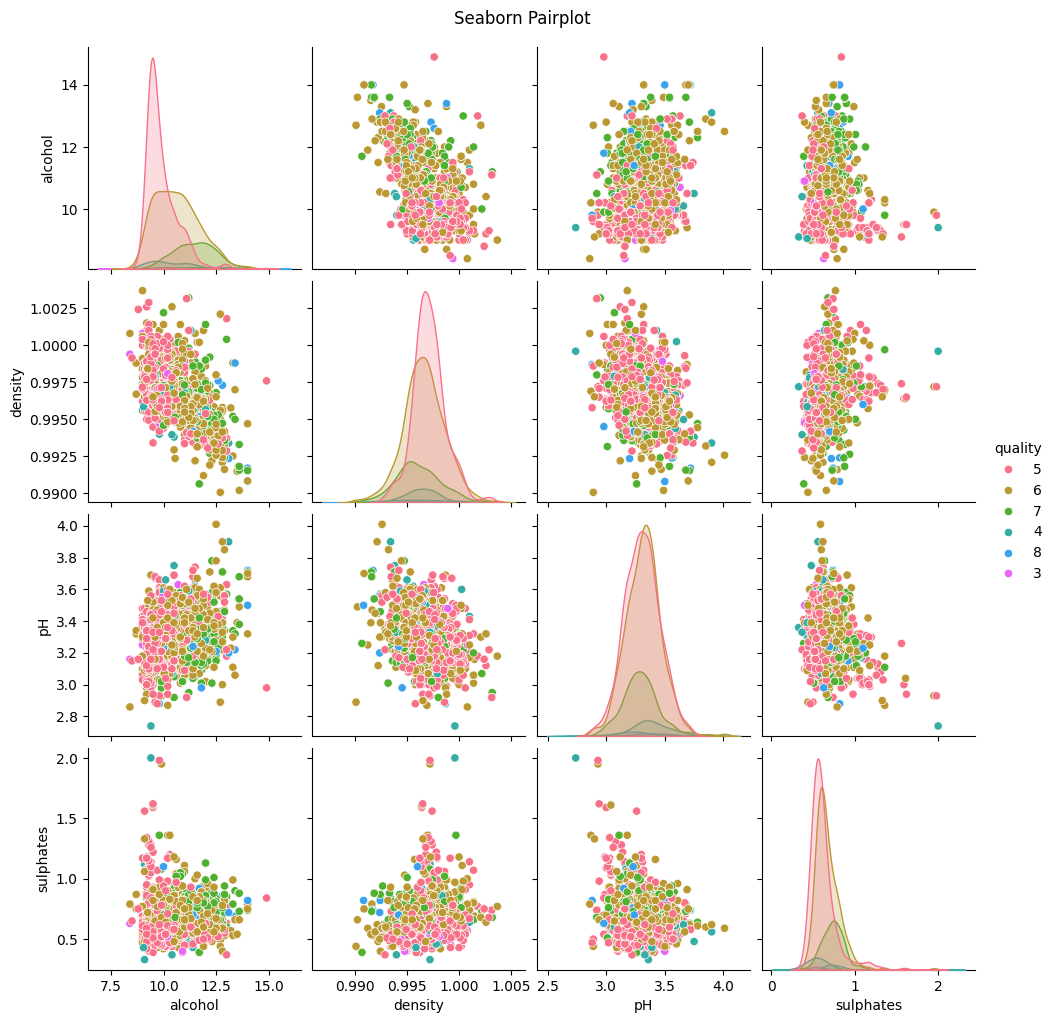

In [4]:


sns.pairplot(df, vars=['alcohol', 'density', 'pH', 'sulphates'], hue='quality', palette='husl')
plt.suptitle("Seaborn Pairplot", y=1.02)
plt.show()


4. PCA Projection

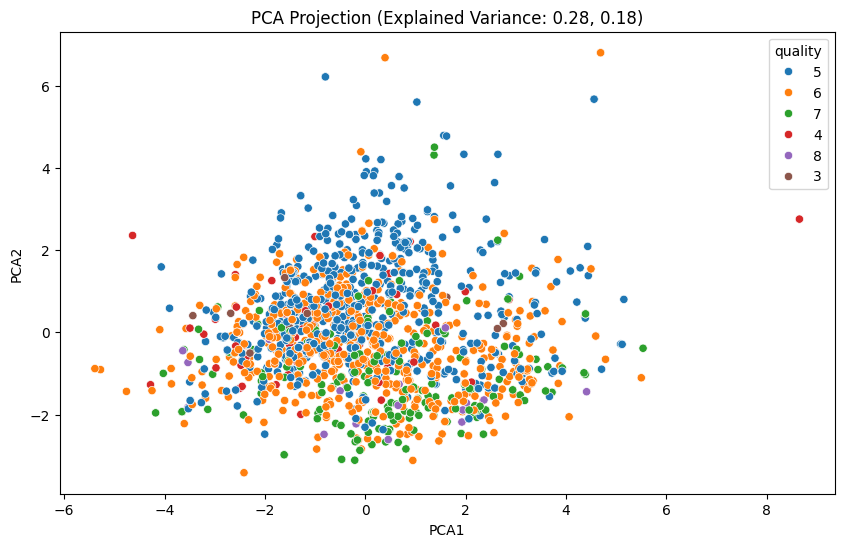

In [5]:


# Normalize
X = df.drop('quality', axis=1)
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='quality', data=df, palette='tab10')
plt.title(f"PCA Projection (Explained Variance: {pca.explained_variance_ratio_[0]:.2f}, {pca.explained_variance_ratio_[1]:.2f})")
plt.show()


5. t-SNE Embedding

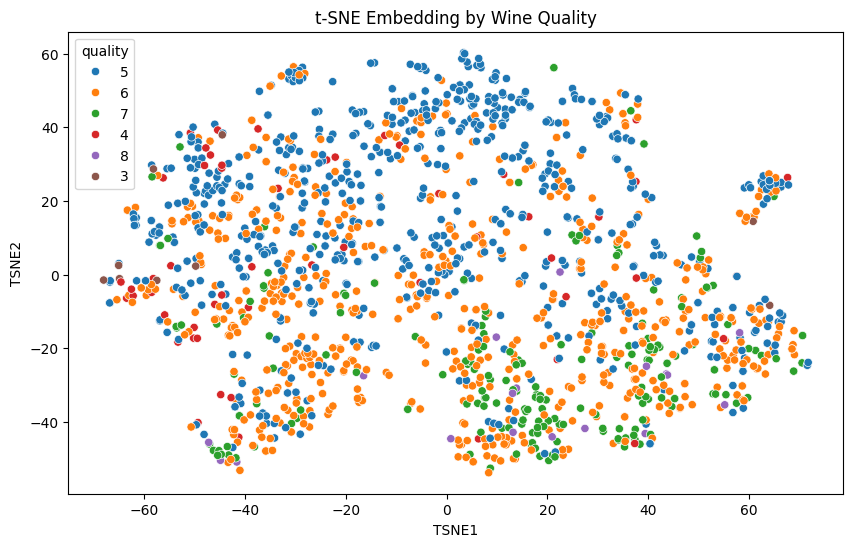

In [6]:


# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='quality', data=df, palette='tab10')
plt.title("t-SNE Embedding by Wine Quality")
plt.show()
